In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv(r"C:\Users\jongmin\Downloads\DeepLearning\data\abalone.csv",index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [3]:
X = df.drop('Rings',axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [4]:

y = df['Rings']
y.head()


id
0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
X['Sex']=labelencoder.fit_transform(X['Sex'])

In [6]:

Y = pd.get_dummies(y).values

In [7]:

X = X.values

In [8]:

X

array([[2.    , 0.455 , 0.365 , ..., 0.2245, 0.101 , 0.15  ],
       [2.    , 0.35  , 0.265 , ..., 0.0995, 0.0485, 0.07  ],
       [0.    , 0.53  , 0.42  , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [2.    , 0.6   , 0.475 , ..., 0.5255, 0.2875, 0.308 ],
       [0.    , 0.625 , 0.485 , ..., 0.531 , 0.261 , 0.296 ],
       [2.    , 0.71  , 0.555 , ..., 0.9455, 0.3765, 0.495 ]])

In [9]:

y

id
0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [10]:

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [11]:

X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((3341, 8), (3341, 28), (836, 8), (836, 28))

In [12]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(8,)))
model.add(Dense(30))
model.add(Dense(30))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 30)                270       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,303
Trainable params: 1,303
Non-trainable params: 0
_________________________________________________________________


In [13]:

N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
105/105 [==============================] - 1s 4ms/step - loss: 0.0819 - mse: 0.0819 - val_loss: 0.0515 - val_mse: 0.0515
Epoch 2/10
105/105 [==============================] - 0s 2ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0354 - val_mse: 0.0354
Epoch 3/10
105/105 [==============================] - 0s 2ms/step - loss: 0.0372 - mse: 0.0372 - val_loss: 0.0349 - val_mse: 0.0349
Epoch 4/10
105/105 [==============================] - 0s 2ms/step - loss: 0.0367 - mse: 0.0367 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 5/10
105/105 [==============================] - 0s 2ms/step - loss: 0.0361 - mse: 0.0361 - val_loss: 0.0355 - val_mse: 0.0355
Epoch 6/10
105/105 [==============================] - 0s 2ms/step - loss: 0.0359 - mse: 0.0359 - val_loss: 0.0347 - val_mse: 0.0347
Epoch 7/10
105/105 [==============================] - 0s 2ms/step - loss: 0.0356 - mse: 0.0356 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 8/10
105/105 [==============================] - 0s 2ms/step - loss: 0.

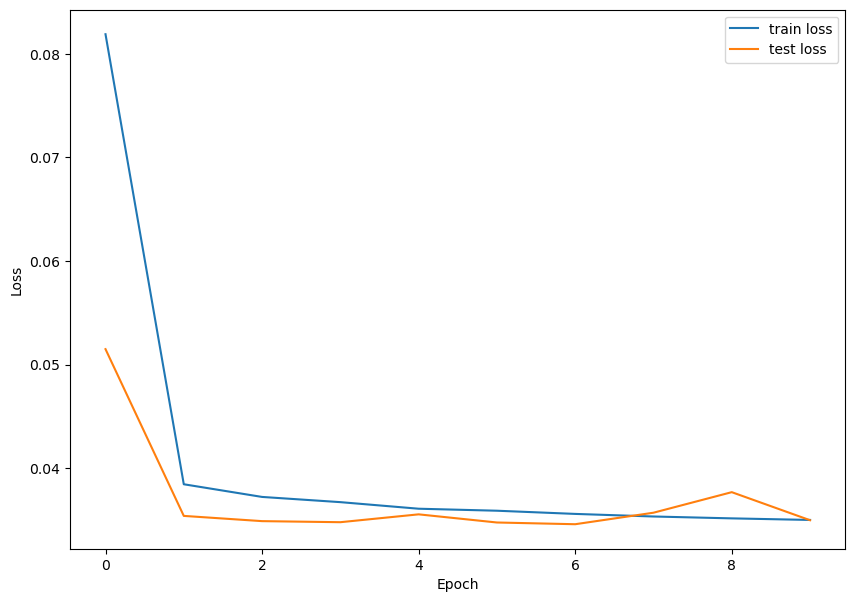

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:

model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 2ms/step - loss: 0.0350 - mse: 0.0350


[0.034965354949235916, 0.034965354949235916]